First, I imported the Pandas library to handle and analyze the data.

The datasets used in this analysis were imported from the Gapminder platform, including GDP per capita, population, and life expectancy data.


In [8]:
import pandas as pd 

In [9]:
gdp = pd.read_csv('gdp_pcap.csv')

In [10]:
population = pd.read_csv('pop.csv')

In [11]:
life_expectancy = pd.read_csv('lex.csv')

In [12]:
print("GDP Data:")
print(gdp.head())
print("\nPopulation Data:")
print(population.head())

print("\nLife Expectancy Data:")
print(life_expectancy.head())

GDP Data:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   481   481   481   481   481   481   481   481   481  ...   
1       Angola   373   374   376   378   379   381   383   385   386  ...   
2      Albania   469   471   472   473   475   476   477   479   480  ...   
3      Andorra  1370  1370  1370  1380  1380  1380  1390  1390  1390  ...   
4          UAE  1140  1150  1150  1150  1160  1160  1170  1170  1180  ...   

    2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0   4680   4790   4910   5020   5140   5260   5380   5510   5640   5780  
1  24.5k    25k  25.6k  26.1k  26.6k  27.1k  27.7k  28.2k  28.8k  29.3k  
2  54.5k  55.1k  55.7k  56.3k  56.9k  57.4k    58k  58.6k  59.2k  59.8k  
3  79.9k  80.2k  80.4k  80.7k    81k  81.3k  81.5k  81.8k    82k  82.3k  
4  92.6k  92.6k  92.6k  92.7k  92.7k  92.7k  92.8k  92.8k  92.8k  92.9k  

[5 rows x 302 columns]

Population Data:
       country   1800   1801   1802   180

Next, I reshaped the datasets from wide format to long format using the Pandas melt function, as long format is more suitable for data analysis and visualization.

In [13]:
# GDP'yi wide formattan long formata dönüştürme
gdp_long = gdp.melt(id_vars=["country"], var_name="year", value_name="GDP per Capita")

# Population verisi için aynı işlemi yapalım
population_long = population.melt(id_vars=["country"], var_name="year", value_name="Population")

# Life Expectancy verisi için de aynı işlem
life_expectancy_long = life_expectancy.melt(id_vars=["country"], var_name="year", value_name="Life Expectancy")

# Dönüştürülmüş verileri kontrol edelim
print(gdp_long.head())
print(population_long.head())
print(life_expectancy_long.head())


       country  year GDP per Capita
0  Afghanistan  1800            481
1       Angola  1800            373
2      Albania  1800            469
3      Andorra  1800           1370
4          UAE  1800           1140
       country  year Population
0  Afghanistan  1800      3.28M
1       Angola  1800      1.57M
2      Albania  1800       400k
3      Andorra  1800       2650
4          UAE  1800      40.2k
       country  year  Life Expectancy
0  Afghanistan  1800             28.2
1       Angola  1800             27.0
2      Albania  1800             35.4
3      Andorra  1800              NaN
4          UAE  1800             30.7


Once the datasets were converted to long format, I combined them into a single DataFrame by merging based on shared columns like 'country' and 'year', to facilitate further analysis.

In [14]:
# GDP ve Population verilerini birleştir
merged_data = pd.merge(gdp_long, population_long, on=["country", "year"])

# Life Expectancy verisini ekle
merged_data = pd.merge(merged_data, life_expectancy_long, on=["country", "year"])

print("Merged Data:")
print(merged_data.head())


Merged Data:
       country  year GDP per Capita Population  Life Expectancy
0  Afghanistan  1800            481      3.28M             28.2
1       Angola  1800            373      1.57M             27.0
2      Albania  1800            469       400k             35.4
3      Andorra  1800           1370       2650              NaN
4          UAE  1800           1140      40.2k             30.7


I identified missing values in the combined dataset using the isnull().sum() function. To maintain the quality of the analysis, I removed all rows containing missing values using the dropna() method and verified the dataset again.

In [15]:
# Eksik değerleri kontrol et
print("Missing values:\n", merged_data.isnull().sum())

# Eksik değerleri kaldır
merged_data.dropna(inplace=True)

# Veriyi tekrar kontrol et
print("Cleaned Data:")
print(merged_data.head())

Missing values:
 country               0
year                  0
GDP per Capita        0
Population            0
Life Expectancy    1350
dtype: int64
Cleaned Data:
       country  year GDP per Capita Population  Life Expectancy
0  Afghanistan  1800            481      3.28M             28.2
1       Angola  1800            373      1.57M             27.0
2      Albania  1800            469       400k             35.4
4          UAE  1800           1140      40.2k             30.7
5    Argentina  1800           1700       534k             33.2


I displayed the first and last rows of the dataset to get an overview of its structure and content. 

In [21]:
print("First 5 rows:")
print(merged_data.head())

print("Last 5 rows:")
print(merged_data.tail())

First 5 rows:
       country  year GDP per Capita Population  Life Expectancy
0  Afghanistan  1800            481      3.28M             28.2
1       Angola  1800            373      1.57M             27.0
2      Albania  1800            469       400k             35.4
4          UAE  1800           1140      40.2k             30.7
5    Argentina  1800           1700       534k             33.2
Last 5 rows:
            country  year GDP per Capita Population  Life Expectancy
58690         Samoa  2100          28.6k       384k             82.3
58691         Yemen  2100           7650       110M             82.1
58692  South Africa  2100          50.1k      94.3M             75.2
58693        Zambia  2100          20.3k      64.5M             74.5
58694      Zimbabwe  2100          12.2k      37.2M             71.3


To understand the dataset better, I determined the number of unique countries represented by using the nunique() function on the 'country' column.  

In [20]:
unique_countries = merged_data['country'].nunique()
print(f"Number of unique countries: {unique_countries}")


Number of unique countries: 195


To focus on a specific time period, I filtered the dataset to extract all data corresponding to the year 1999 using the condition merged_data['year'] == 1999.

In [17]:
year_1999_data = merged_data[merged_data['year'] == '1999']
print("Data for the year 1999:")
print(year_1999_data)

Data for the year 1999:
            country  year GDP per Capita Population  Life Expectancy
38805   Afghanistan  1999           1090      19.9M             54.7
38806        Angola  1999           4190      15.7M             51.9
38807       Albania  1999           5410      3.19M             75.1
38808       Andorra  1999          47.2k      65.7k             80.6
38809           UAE  1999          85.7k      3.27M             69.2
...             ...   ...            ...        ...              ...
38995         Samoa  1999           4110       180k             68.3
38996         Yemen  1999           3770        19M             63.0
38997  South Africa  1999           9910      46.7M             57.2
38998        Zambia  1999           1960      9.74M             45.3
38999      Zimbabwe  1999           2830      11.8M             48.5

[195 rows x 5 columns]


Since I couldn't directly filter countries in the African continent from the dataset, I first created a list of African countries.

In [22]:
# Afrika'daki ülkelerin listesi
africa_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cape Verde", "Cameroon", "Chad", "Comoros", "Congo", "Djibouti", "Egypt",
    "Equatorial Guinea", "Eritrea", "Eswatini (Swaziland)", "Ethiopia", "Gabon",
    "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast (Côte d'Ivoire)",
    "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
    "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger",
    "Nigeria", "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles",
    "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan",
    "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]


I then filtered the dataset to include only the countries from the African continent using the list I created.

In [24]:
# Veri setini Afrika ülkelerine göre filtrele
africa_data = merged_data[merged_data['country'].isin(africa_countries)]

# Sonuçları görüntüle
print("Filtered data for African countries:")
print(africa_data.head())

Filtered data for African countries:
         country  year GDP per Capita Population  Life Expectancy
1         Angola  1800            373      1.57M             27.0
11       Burundi  1800            531       899k             31.5
13         Benin  1800            835       637k             31.0
14  Burkina Faso  1800            595      1.67M             29.2
27      Botswana  1800            358       121k             33.6


Since the values in the Population column included 'k' and 'M', I couldn't directly filter values greater than 1,000,000. Therefore, I converted these values into floats to enable numerical comparisons.

In [25]:
# 'Population' sütununu düzenleme fonksiyonu
def convert_population(value):
    if isinstance(value, str):  # Eğer değer bir metinse
        if "M" in value:  # 'M' harfi varsa
            return float(value.replace("M", "")) * 1_000_000
        elif "k" in value:  # 'k' harfi varsa
            return float(value.replace("k", "")) * 1_000
    return value  # Eğer dönüşüm gerekmezse olduğu gibi döndür

# Population sütununu düzenleme
merged_data['Population'] = merged_data['Population'].apply(convert_population)

# Tüm Population değerlerini sayıya dönüştür
merged_data['Population'] = pd.to_numeric(merged_data['Population'], errors='coerce')

# Eksik değerleri kaldır
merged_data.dropna(subset=['Population'], inplace=True)

After transforming the population values into numeric format, I filtered the dataset to include only countries with populations exceeding 1 million for additional analysis.

In [26]:
# Nüfusu 1 milyondan fazla olan ülkeleri seç
filtered_africa_data = merged_data[merged_data['Population'] > 1_000_000]

# Sonuçları görüntüle
print(filtered_africa_data)


            country  year GDP per Capita   Population  Life Expectancy
0       Afghanistan  1800            481    3280000.0             28.2
1            Angola  1800            373    1570000.0             27.0
9           Austria  1800           1940    3000000.0             34.4
12          Belgium  1800           2660    3250000.0             40.0
14     Burkina Faso  1800            595    1670000.0             29.2
...             ...   ...            ...          ...              ...
58688       Vietnam  2100          55.3k   91700000.0             86.7
58691         Yemen  2100           7650  110000000.0             82.1
58692  South Africa  2100          50.1k   94300000.0             75.2
58693        Zambia  2100          20.3k   64500000.0             74.5
58694      Zimbabwe  2100          12.2k   37200000.0             71.3

[38461 rows x 5 columns]


I sorted the dataset in ascending order based on life expectancy to analyze countries with the lowest life expectancies.

I added a new column, 'Population Category', to classify countries as 'High', 'Medium', or 'Low' population based on defined thresholds: greater than 50 million, between 10 and 50 million, and less than or equal to 10 million, respectively.

In [27]:
# Veri setini yaşam beklentisine göre sıralama
sorted_data = merged_data.sort_values(by='Life Expectancy', ascending=True)

# Nüfus kategorilerini belirleyen fonksiyon
def categorize_population(population):
    if population > 50_000_000:
        return 'High'
    elif population > 10_000_000:
        return 'Medium'
    else:
        return 'Low'

# Yeni bir 'Population Category' sütunu ekleme
merged_data['Population Category'] = merged_data['Population'].apply(categorize_population)

# Sonuçları görüntüle
print("Dataset sorted by Life Expectancy:")
print(sorted_data.head())

print("Dataset with Population Category:")
print(merged_data[['country', 'Population', 'Population Category']].head())


Dataset sorted by Life Expectancy:
                country  year GDP per Capita  Population  Life Expectancy
45507  Hong Kong, China  2033          67.2k   7140000.0              0.0
50382  Hong Kong, China  2058          77.4k   5380000.0              0.0
52722  Hong Kong, China  2070            81k   4330000.0              0.0
51357  Hong Kong, China  2063            79k   4940000.0              0.0
55062  Hong Kong, China  2082          83.9k   3290000.0              0.0
Dataset with Population Category:
       country  Population Population Category
0  Afghanistan   3280000.0                 Low
1       Angola   1570000.0                 Low
2      Albania    400000.0                 Low
4          UAE     40200.0                 Low
5    Argentina    534000.0                 Low


Since I couldn’t find a dataset containing continent information, I manually assigned continents to each country in the dataset.

In [29]:
# Ülke-kıta eşleme sözlüğü
continent_map = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cabo Verde": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo": "Africa",
    "Costa Rica": "North America",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Asia",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini (Swaziland)": "Africa",
    "Ethiopia": "Africa",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast (Côte d'Ivoire)": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "North Macedonia": "Europe",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Timor-Leste": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa"
}


In [30]:
# Kıta sütununu veri setine ekle
merged_data['continent'] = merged_data['country'].map(continent_map)

# İlk birkaç satırı kontrol et
print(merged_data[['country', 'continent']].head())


       country      continent
0  Afghanistan           Asia
1       Angola         Africa
2      Albania         Europe
4          UAE            NaN
5    Argentina  South America


In [31]:
# Veri setine kıta sütunu ekle
merged_data['continent'] = merged_data['country'].map(continent_map)

# İlk birkaç satırı görüntüle
print(merged_data[['country', 'continent']].head())


       country      continent
0  Afghanistan           Asia
1       Angola         Africa
2      Albania         Europe
4          UAE            NaN
5    Argentina  South America


In [32]:
# NaN olan ülkeleri kontrol et
missing_countries = merged_data[merged_data['continent'].isnull()]['country'].unique()
print("Countries without continent mapping:")
print(missing_countries)


Countries without continent mapping:
['UAE' "Cote d'Ivoire" 'Congo, Dem. Rep.' 'Congo, Rep.' 'Cape Verde'
 'Micronesia, Fed. Sts.' 'UK' 'Hong Kong, China' 'Kyrgyz Republic' 'Lao'
 'St. Lucia' 'Myanmar' 'Palestine' 'Slovak Republic' 'Eswatini' 'Taiwan'
 'USA' 'St. Vincent and the Grenadines' 'St. Kitts and Nevis']


In [33]:
# Eksik kıta bilgileri
additional_continents = {
    "UAE": "Asia",  # United Arab Emirates
    "Cote d'Ivoire": "Africa",  # Ivory Coast
    "Congo, Dem. Rep.": "Africa",  # Democratic Republic of the Congo
    "Congo, Rep.": "Africa",  # Republic of the Congo
    "Cape Verde": "Africa",  # Cabo Verde
    "Micronesia, Fed. Sts.": "Oceania",  # Federated States of Micronesia
    "UK": "Europe",  # United Kingdom
    "Hong Kong, China": "Asia",  # Hong Kong
    "Kyrgyz Republic": "Asia",  # Kyrgyzstan
    "Lao": "Asia",  # Laos
    "St. Lucia": "North America",  # Saint Lucia
    "Myanmar": "Asia",  # Burma
    "Palestine": "Asia",  # Palestine
    "Slovak Republic": "Europe",  # Slovakia
    "Eswatini": "Africa",  # Formerly Swaziland
    "Taiwan": "Asia",  # Taiwan
    "USA": "North America",  # United States of America
    "St. Vincent and the Grenadines": "North America",  # Saint Vincent
    "St. Kitts and Nevis": "North America"  # Saint Kitts
}


I calculated the average GDP per capita for each continent by grouping the data using the continent column and computing the mean of the GDP per Capita values for each group.

In [36]:
# GDP per Capita sütununu sayısal bir tipe dönüştür
merged_data['GDP per Capita'] = pd.to_numeric(merged_data['GDP per Capita'], errors='coerce')

# Dönüştürme sonrası eksik değerleri kontrol et
print(merged_data['GDP per Capita'].isnull().sum())


16778


In [42]:
# GDP per Capita sütununu sayısal tipe dönüştür
merged_data['GDP per Capita'] = pd.to_numeric(merged_data['GDP per Capita'], errors='coerce')

# Eksik değerleri kontrol et ve kaldır
merged_data.dropna(subset=['GDP per Capita'], inplace=True)

# Her kıta için kişi başına düşen ortalama GSYİH'yi hesapla
average_gdp_per_continent = merged_data.groupby('continent')['GDP per Capita'].mean()

# Sonuçları görüntüle
print("Average GDP per capita for each continent:")
print(average_gdp_per_continent)


Average GDP per capita for each continent:
continent
Africa           1938.024445
Asia             2185.236045
Europe           3066.722177
North America    2802.800107
Oceania          2905.836232
South America    3272.919417
Name: GDP per Capita, dtype: float64


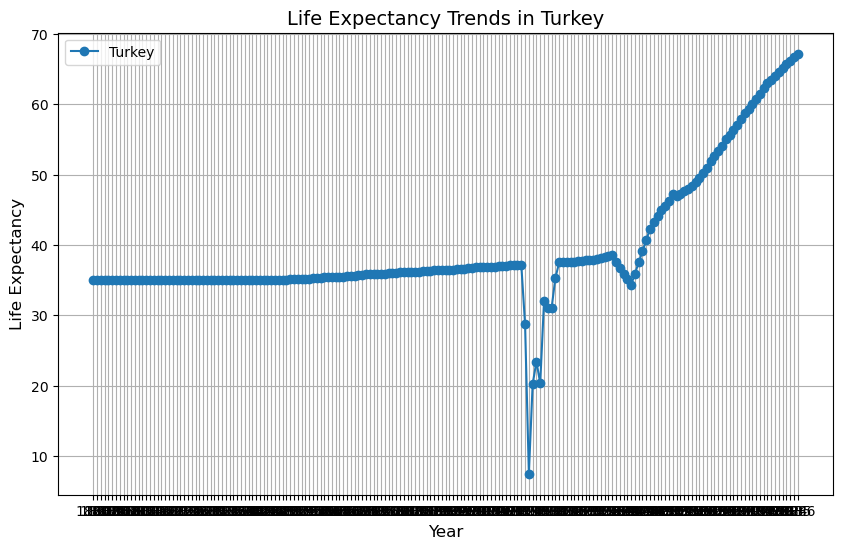

In [43]:
import matplotlib.pyplot as plt

# Seçilen ülke
selected_country = "Turkey"

# Veriyi filtrele
country_data = merged_data[merged_data['country'] == selected_country]

# Yıllara göre sıralama (Görsel için temiz bir çizgi)
country_data = country_data.sort_values(by='year')

# Yaşam Beklentisi Trend Grafiği
plt.figure(figsize=(10, 6))
plt.plot(country_data['year'], country_data['Life Expectancy'], marker='o', label=selected_country)

# Grafik detayları
plt.title(f"Life Expectancy Trends in {selected_country}", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life Expectancy", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


I visualized the trends in life expectancy over the years for Turkey using Pandas' and Matplotlib's plotting functions. Line plot was generated to display the changes in life expectancy over time.